In [1]:
import re
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
df = pd.read_csv("GOOGL.csv")
df = df.iloc[::-1]
df

,Unnamed: 0,volume,open,close,high,low,date
502471,1956,7722,923.26,922.8700,925.4900,922.87,2017-07-06 13:59:00
502470,1955,6410,923.81,924.6000,925.0100,923.81,2017-07-06 14:00:00
502469,1954,5262,924.71,924.5806,924.8700,924.17,2017-07-06 14:01:00
502468,1953,3788,924.77,923.1100,924.7700,923.11,2017-07-06 14:02:00
502467,1952,7183,923.19,923.4200,924.6900,923.10,2017-07-06 14:03:00
...,...,...,...,...,...,...,...
4,4,1937,2285.19,2284.6200,2288.0999,2283.54,2022-06-28 15:00:00
3,3,3887,2286.71,2281.7200,2286.7100,2281.72,2022-06-28 15:01:00
2,2,2036,2281.80,2284.4400,2284.4400,2281.72,2022-06-28 15:02:00
1,1,1621,2285.00,2285.1685,2286.3762,2285.00,2022-06-28 15:03:00


In [3]:
del df['Unnamed: 0']
df

,volume,open,close,high,low,date
502471,7722,923.26,922.8700,925.4900,922.87,2017-07-06 13:59:00
502470,6410,923.81,924.6000,925.0100,923.81,2017-07-06 14:00:00
502469,5262,924.71,924.5806,924.8700,924.17,2017-07-06 14:01:00
502468,3788,924.77,923.1100,924.7700,923.11,2017-07-06 14:02:00
502467,7183,923.19,923.4200,924.6900,923.10,2017-07-06 14:03:00
...,...,...,...,...,...,...
4,1937,2285.19,2284.6200,2288.0999,2283.54,2022-06-28 15:00:00
3,3887,2286.71,2281.7200,2286.7100,2281.72,2022-06-28 15:01:00
2,2036,2281.80,2284.4400,2284.4400,2281.72,2022-06-28 15:02:00
1,1621,2285.00,2285.1685,2286.3762,2285.00,2022-06-28 15:03:00


In [4]:
df.describe()

,volume,open,close,high,low
count,502472.000000,502472.000000,502472.000000,502472.000000,502472.000000
mean,3885.304841,1597.954989,1597.949069,1598.510521,1597.391526
std,6861.852373,629.852226,629.849737,630.030984,629.667311
min,0.000000,917.200000,917.200000,917.200000,917.200000
25%,1250.000000,1116.270000,1116.275175,1116.730000,1115.830000
50%,2348.000000,1277.370000,1277.347500,1278.000000,1276.815000
75%,4343.000000,2086.107500,2086.220000,2086.852500,2085.450025
max,517583.000000,3058.000000,3058.000000,3058.000000,3058.000000


In [12]:
google_stock = df['close'].values.astype('float32')
google_stock = google_stock.reshape(len(google_stock), 1)

502472

In [ ]:
import plotly.express as px

fig = px.line(df, x='date', y="close", width = 500, height = 300)
fig.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
google_stock_n = scaler.fit_transform(google_stock)

In [11]:
def train_test_split(stock):
  train_size = int(len(stock) * 0.80)
  test_size = len(stock) - train_size
  train, test = stock[0:train_size,:], stock[train_size:len(stock),:]
  return train, test


In [43]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
def create_trainTest():
	train, test = train_test_split(google_stock_n)
	# reshape into X=t and Y=t+1
	look_back = 1
	trainX, trainY = create_dataset(train, look_back)
	testX, testY = create_dataset(test, look_back)
	trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
	testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
	return trainX, testX, trainY, testY


In [ ]:
def new_trainTest():
    """
    This function will flow in the new data and preprocess it
    """
    return None

3141/3141 [==============================] - 2s 518us/step
Train Mean Absolute Error: 8.404553075011938
Train Root Mean Squared Error: 13.040908472481718
Test Mean Absolute Error: 146.07120352344657
Test Root Mean Squared Error: 165.9390797255159


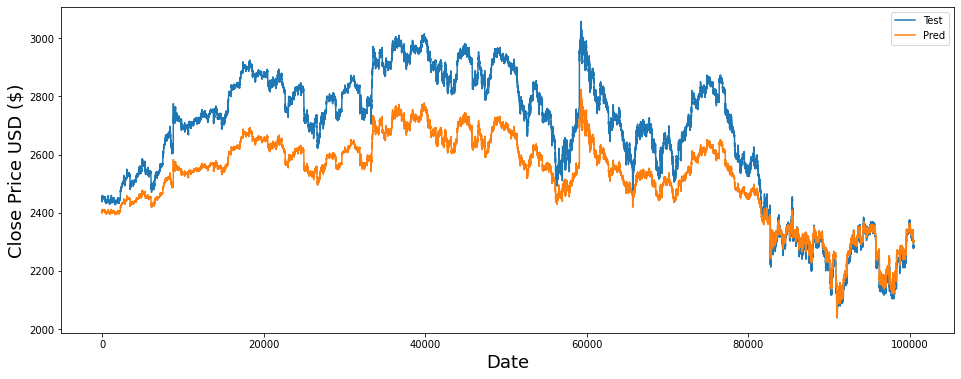

In [49]:
from tensorflow.keras import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


def first_train():
  trainX, testX, trainY, testY = create_trainTest()
  model = Sequential()
  model.add(LSTM(units=50,return_sequences=True,input_shape=(trainX.shape[1], 1), activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(LSTM(units=50,return_sequences=True, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(LSTM(units=50,return_sequences=True, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(LSTM(units=50, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(units=1))
  model.compile(optimizer='adam',loss='mean_squared_error')
  model.fit(trainX, trainY,epochs=1,batch_size=64)
  model.save('test1.h5')


def evaluate_model():
  trainX, testX, trainY, testY = create_trainTest()

  model = tf.keras.models.load_model('test1.h5')

  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)
  # invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  testPredict = scaler.inverse_transform(testPredict)

  #invert train and test Y
  trainY = scaler.inverse_transform([trainY])
  testY = scaler.inverse_transform([testY])

  
  print('Train Mean Absolute Error:', mean_absolute_error(trainY[0], trainPredict[:, 0]))
  print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])))
  print('Test Mean Absolute Error:', mean_absolute_error(testY[0], testPredict[:, 0]))
  print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(testY[0], testPredict[:, 0])))

  plt.figure(figsize=(16,6))
  plt.xlabel('Date', fontsize = 18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(testY[0])
  plt.plot(testPredict)
  plt.legend(['Test', 'Pred'])
  plt.show()
  
  return model

def re_train(model):
  new_trainX, new_trainY, new_testX, new_testY = new_trainTest()
  model.save('test1.h5')
  model1 = tf.keras.models.load_model('test1.h5')
  model = Sequential([model1])
  model.compile(optimizer='adam',loss='mean_squared_error') 
  model.fit(new_trainX, new_trainY, epochs = 100, batch_size=32)
  results = model.evaluate(new_testX, new_testY, batch_size=32)
  print("test loss, test MSE:", np.sqrt(results))

first_train()
evaluate_model()